# Magnus Dataset - Sales Analysis

In [2]:
# importing necessary libraries
import numpy as np
from matplotlib import pyplot as plt 
import pandas as pd
from matplotlib import dates as mpl_dates

In [3]:
# loading the datasets
calendar = pd.read_csv("Calendar.csv")
customers = pd.read_csv("Customers.csv")
product_categories = pd.read_csv("Product_Categories.csv")
product_subcategories = pd.read_csv("Product_Subcategories.csv")
products = pd.read_csv("Products.csv")
returns = pd.read_csv("Returns.csv")
sales_2015 = pd.read_csv("Sales_2015.csv")
sales_2016 = pd.read_csv("Sales_2016.csv")
sales_2017 = pd.read_csv("Sales_2017.csv")
territories = pd.read_csv("Territories.csv")

#### Data Understanding & Initial Inspection

In [4]:
# inspecting calendar table
calendar.head()
calendar.info()
calendar.isnull().sum()
calendar.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    912 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


np.int64(0)

1. The calendar table contains 911 entries with a single "Date" column.
2. No missing data or duplicates are present.
3. The Date column is as object which will be converted into datetime later during data cleaning phase.


In [5]:
# inspecting customers table
customers.head()
customers.info()
customers.isnull().sum()
customers.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18148 entries, 0 to 18147
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      18148 non-null  int64 
 1   Prefix          18018 non-null  object
 2   FirstName       18148 non-null  object
 3   LastName        18148 non-null  object
 4   BirthDate       18148 non-null  object
 5   MaritalStatus   18148 non-null  object
 6   Gender          18018 non-null  object
 7   EmailAddress    18148 non-null  object
 8   AnnualIncome    18148 non-null  int64 
 9   TotalChildren   18148 non-null  int64 
 10  EducationLevel  18148 non-null  object
 11  Occupation      18148 non-null  object
 12  HomeOwner       18148 non-null  object
dtypes: int64(3), object(10)
memory usage: 1.8+ MB


np.int64(0)

1. The customers table contains 18,148 customer records.
2. CustomerID is the primary key.
3. Minor missing values are present in Prefix and Gender (~130 records each).
4. BirthDate is stored as an object and will require datetime conversion.
5. Income and demographic attributes are available for customer-level analysis.

In [6]:
# inspecting product-categories table
product_categories.head()
product_categories.info()
product_categories.isnull().sum()
product_categories.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ProductCategoryID  4 non-null      int64 
 1   CategoryName       4 non-null      object
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


np.int64(0)

1. The product-categories table contains 2 columns and 4 unique product categories.
2. The ProductCategoryID acts as primary key.
3. No data is missing, duplicates are also not present.
4. This table will be used to categorize products during analysis.

In [7]:
# inspecting product subcategories table
product_subcategories.head()
product_subcategories.info()
product_subcategories.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SubcategoryID  37 non-null     int64 
 1   Subcategory    37 non-null     object
 2   CategoryID     37 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1020.0+ bytes


np.int64(0)

1. The table contains 37 product categories.
2. SubCategoryID is the primary key.
3. CategoryID is the foreign key.
4. No missing data or duplicates are found.

In [8]:
# inspecting the products table
products.head()
products.info()
products.isnull().sum()
products.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          293 non-null    int64  
 1   Product_ID          293 non-null    int64  
 2   SubCategory_id      293 non-null    int64  
 3   ProductSKU          293 non-null    object 
 4   ProductName         293 non-null    object 
 5   ModelName           293 non-null    object 
 6   ProductDescription  293 non-null    object 
 7   ProductColor        293 non-null    object 
 8   ProductSize         293 non-null    object 
 9   ProductStyle        293 non-null    object 
 10  ProductCost         293 non-null    float64
 11  ProductPrice        293 non-null    float64
dtypes: float64(2), int64(3), object(7)
memory usage: 27.6+ KB


np.int64(0)

1. The products table contains 11 columns with 293 entries.
2. There are no missing values or duplicates.
3. Product_ID is the primary key. SubCategory_id is the foreign key.
4. Pricing and cost attributes can be used in profitability analysis.
5. This table will be central to revenue, margin, and product performance analysis.

In [9]:
# inspecting the returns table 
returns.head()
returns.info()
returns.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ReturnDate      1809 non-null   object
 1   Territory_id    1809 non-null   int64 
 2   Product_id      1809 non-null   int64 
 3   ReturnQuantity  1809 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 56.7+ KB


np.int64(0)

1. Returns table contains 4 columns with 1809 entries.
2. Product_id and Territory_id act as foreign keys.
3. ReturnDate is stored as an object later to be converted to datetime.
4. No missing or duplicate values are found.
5. This table will be used to analyze return rates and revenue loss.

In [10]:
# inspecting one of the sales table, sales_2015
sales_2015.head()
sales_2015.info()
sales_2015.isnull().sum()
sales_2015.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OrderDate      2630 non-null   object
 1   StockDate      2630 non-null   object
 2   OrderNumber    2630 non-null   object
 3   Product_ID     2630 non-null   int64 
 4   Customer_ID    2630 non-null   int64 
 5   Territory_ID   2630 non-null   int64 
 6   OrderLineItem  2630 non-null   int64 
 7   OrderQuantity  2630 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 164.5+ KB


np.int64(0)

1. The dataset contains 2,630 sales transactions for the year 2015
2. Date columns (OrderDate, StockDate) are stored as objects later to be converted to datetime
3. Foreign keys link sales data to customers, products, and territories
4. No missing or duplicate values were found
5. Sales datasets for other years share the same schema later to be concatenated

In [11]:
# inspecting territories table
territories.head()
territories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Territory_id  10 non-null     int64 
 1   Region        10 non-null     object
 2   Country       10 non-null     object
 3   Continent     10 non-null     object
dtypes: int64(1), object(3)
memory usage: 452.0+ bytes


1. Territories table contains 4 columns with 10 entries.
2. No missing or duplicates are found.
3. Territory_id serves as the primary key
4. Region, country, and continent information can be used to perform geographical analysis.



#### Data Preparation

In [12]:
# Merging sales tables into one
sales = pd.concat([sales_2015,sales_2016,sales_2017], ignore_index= True)
sales.to_csv("sales.csv", index = False)
sales = pd.read_csv("sales.csv")
sales.info()
sales.isnull().sum()
sales.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56046 entries, 0 to 56045
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OrderDate      56046 non-null  object
 1   StockDate      56046 non-null  object
 2   OrderNumber    56046 non-null  object
 3   Product_ID     56046 non-null  int64 
 4   Customer_ID    56046 non-null  int64 
 5   Territory_ID   56046 non-null  int64 
 6   OrderLineItem  56046 non-null  int64 
 7   OrderQuantity  56046 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 3.4+ MB


np.int64(0)

1. Sales data from 2015, 2016, and 2017 are combined into a single dataset containing 56,046 transaction records.
2. All datasets shares an identical schema, allowing for a straightforward merge without data loss or duplication.

In [13]:
# changing the data type of dates in sales table from object to date-time 
sales.info()
sales["OrderDate"] = pd.to_datetime(sales["OrderDate"])
sales["StockDate"] = pd.to_datetime(sales["StockDate"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56046 entries, 0 to 56045
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OrderDate      56046 non-null  object
 1   StockDate      56046 non-null  object
 2   OrderNumber    56046 non-null  object
 3   Product_ID     56046 non-null  int64 
 4   Customer_ID    56046 non-null  int64 
 5   Territory_ID   56046 non-null  int64 
 6   OrderLineItem  56046 non-null  int64 
 7   OrderQuantity  56046 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 3.4+ MB


In [14]:
# creating year, month and quarter columns from orderdate column
sales["Year"] = sales["OrderDate"].dt.year
sales["Month"] = sales["OrderDate"].dt.month
sales["Quarter"] = sales["OrderDate"].dt.quarter

##### Merging Tables with Sales Table

In [15]:
# Merge Customers
sales = sales.merge(
    customers,
    left_on="Customer_ID",
    right_on="CustomerID",
    how="left"
)

# Merge Products
sales = sales.merge(
    products,
    left_on="Product_ID",
    right_on="Product_ID",
    how="left"
)

# Merge Product Subcategories
sales = sales.merge(
    product_subcategories,
    left_on="SubCategory_id",
    right_on="SubcategoryID",
    how="left"
)

# Merge Product Categories
sales = sales.merge(
    product_categories,
    left_on="CategoryID",
    right_on="ProductCategoryID",
    how="left"
)

# Merge Territories
sales = sales.merge(
    territories,
    left_on="Territory_ID",
    right_on="Territory_id",
    how="left"
)


In [16]:
# verifying the merge
sales.columns

Index(['OrderDate', 'StockDate', 'OrderNumber', 'Product_ID', 'Customer_ID',
       'Territory_ID', 'OrderLineItem', 'OrderQuantity', 'Year', 'Month',
       'Quarter', 'CustomerID', 'Prefix', 'FirstName', 'LastName', 'BirthDate',
       'MaritalStatus', 'Gender', 'EmailAddress', 'AnnualIncome',
       'TotalChildren', 'EducationLevel', 'Occupation', 'HomeOwner',
       'Unnamed: 0', 'SubCategory_id', 'ProductSKU', 'ProductName',
       'ModelName', 'ProductDescription', 'ProductColor', 'ProductSize',
       'ProductStyle', 'ProductCost', 'ProductPrice', 'SubcategoryID',
       'Subcategory', 'CategoryID', 'ProductCategoryID', 'CategoryName',
       'Territory_id', 'Region', 'Country', 'Continent'],
      dtype='object')

####  Essential calculations

In [17]:
# calculating revenue
sales["Revenue"] = round(sales["OrderQuantity"] * sales["ProductPrice"],2)
sales.Revenue.describe()


count    56046.000000
mean       142.430726
std        271.446020
min          2.420000
25%         13.340000
50%         30.690000
75%        195.050000
max       2639.560000
Name: Revenue, dtype: float64

In [18]:
# calculating profit
sales["Profit"] = (sales["ProductPrice"] - sales["ProductCost"]) * sales["OrderQuantity"]
sales.Profit.describe()

count    56046.000000
mean        39.597857
std         93.663722
min          0.849515
25%          6.128641
50%         13.349515
75%         30.995146
max        923.847088
Name: Profit, dtype: float64

In [19]:
sales["BirthDate"] = pd.to_datetime(sales["BirthDate"]) # converting the birthdate data type to date_time

# calculating Age of customers from birthdate and order date
sales["Age"] = (sales["OrderDate"] - sales["BirthDate"]).dt.days // 365 # this has limitations due to leap years but enough for analysis

In [20]:
sales.columns

Index(['OrderDate', 'StockDate', 'OrderNumber', 'Product_ID', 'Customer_ID',
       'Territory_ID', 'OrderLineItem', 'OrderQuantity', 'Year', 'Month',
       'Quarter', 'CustomerID', 'Prefix', 'FirstName', 'LastName', 'BirthDate',
       'MaritalStatus', 'Gender', 'EmailAddress', 'AnnualIncome',
       'TotalChildren', 'EducationLevel', 'Occupation', 'HomeOwner',
       'Unnamed: 0', 'SubCategory_id', 'ProductSKU', 'ProductName',
       'ModelName', 'ProductDescription', 'ProductColor', 'ProductSize',
       'ProductStyle', 'ProductCost', 'ProductPrice', 'SubcategoryID',
       'Subcategory', 'CategoryID', 'ProductCategoryID', 'CategoryName',
       'Territory_id', 'Region', 'Country', 'Continent', 'Revenue', 'Profit',
       'Age'],
      dtype='object')

## Exploratory Data Analysis

#### Yearly Revenue Trend

In [21]:
# grouping sales table by year then calculating yearly revenue
group_yr = sales.groupby("Year",as_index=False)
yearly_revenue = group_yr["Revenue"].sum()
yearly_revenue

,Year,Revenue
0,2015,467381.79
1,2016,3521222.95
2,2017,3994067.72


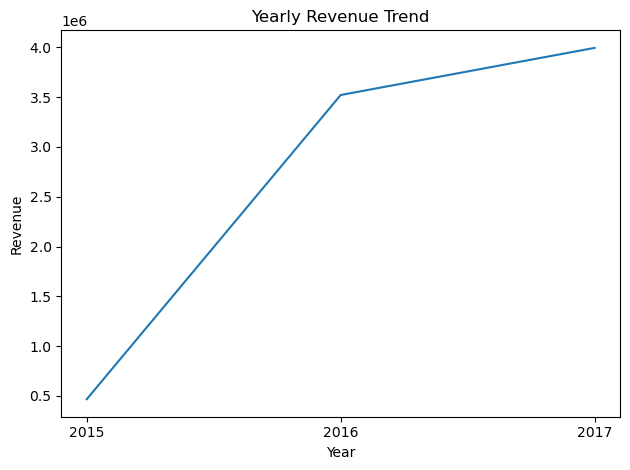

In [22]:
# now plotting
plt.plot(yearly_revenue["Year"].astype(str),yearly_revenue["Revenue"]) #astype converts the year into categorical form
# plt.xticks(yearly_revenue["Year"])
# plt.ticklabel_format(style='plain', axis='y') #use sci parameter for scientific notation 
plt.title("Yearly Revenue Trend")
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.tight_layout()

The yearly revenue trend shows strong growth from 2015 to 2016, followed by continued but slower growth in 2017.

#### Revenue by Month (Seasonality)

In [23]:
# grouping by month 
group_month = sales.groupby(sales["Month"], as_index=False)
monthly_rev = group_month["Revenue"].sum()
monthly_rev

,Month,Revenue
0,1,695913.00
1,2,690258.54
2,3,742734.82
3,4,767074.82
4,5,899025.01
5,6,908708.34
6,7,305292.61
7,8,513617.89
8,9,519815.28
9,10,566033.47


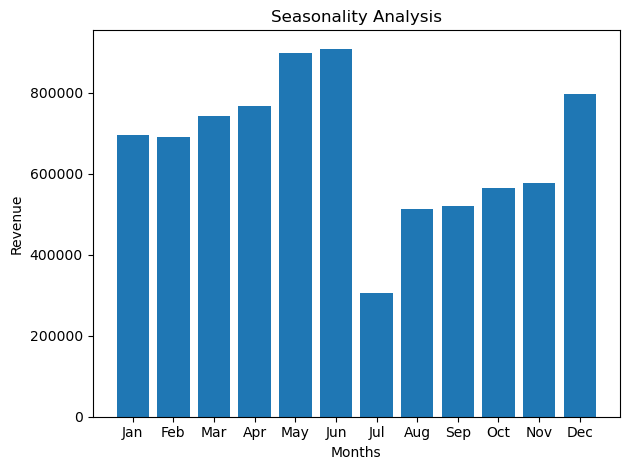

In [24]:
# now plotting 
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"] # this list will be used to put label on x axis instead of month numbers

plt.bar(months,monthly_rev["Revenue"])
plt.ticklabel_format(style='plain', axis='y')
plt.title("Seasonality Analysis")
plt.xlabel("Months")
plt.ylabel("Revenue")
plt.tight_layout()

Monthly revenue analysis helps identify seasonality and peak sales periods across the year.Also shows monthly performance, indicating high demands of products in certain months.

#### Top Categories by Revenue

In [25]:
# grouping and performing aggregation
group_cat = sales.groupby(sales["CategoryName"], as_index= False)
top_cat_by_rev = group_cat["Revenue"].sum()
top_cat_by_rev

,CategoryName,Revenue
0,Furniture,4580493.33
1,Jewellery,147627.82
2,Toys & School Supplies,3254551.31


Text(0.5, 1.0, 'Category Wise Revenue')

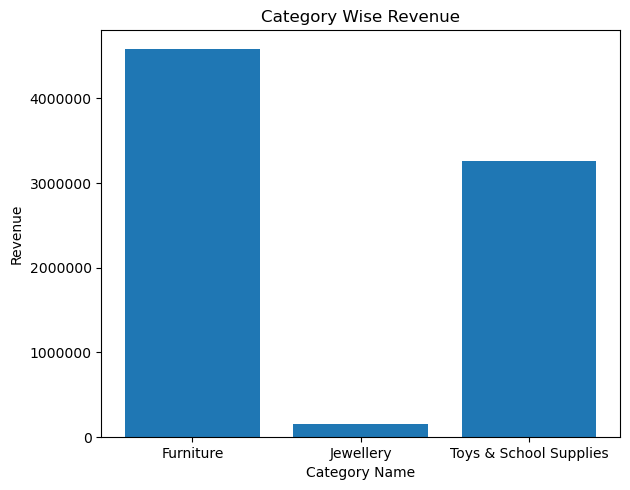

In [26]:
# now plotting
plt.bar(top_cat_by_rev["CategoryName"],top_cat_by_rev["Revenue"])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Category Name")
plt.ylabel("Revenue")
plt.tight_layout()
plt.title("Category Wise Revenue")

The chart compares total revenue across product categories, highlighting the categories that contribute the most to overall sales.

#### Top Products by Revenue

In [27]:
group_by_product = sales.groupby(sales["ProductName"], as_index=False)
prod_by_rev = group_by_product["Revenue"].sum()
prod_by_rev = prod_by_rev.sort_values(by='Revenue', ascending=False).head(15)[::-1]
prod_by_rev

,ProductName,Revenue
111,addee Leather black 16 L Backpack,121161.13
36,Eaglemoss Publications Star Trek Magazine 27,121324.74
28,Durian Harmony/2 Fabric 2 Seater Sofa,140078.70
14,Chess & Magazine 54 Ocean Master Black Pawn,141724.78
31,Durian Madison Leatherette 1 Seater Sofa,242960.99
34,Durian Tulsa Leatherette 1 Seater Sofa,247385.75
94,"Predator Official Licensed7"" Vs Dutch 2 Pack",253997.07
100,Sentinel Metamorforce Dino Getter 2,273253.95
30,Durian Laze/3 Leather 3 Seater Sofa,332584.56
24,Durian Berry Solid Wood 3 Seater Sofa,426796.19


Text(0.5, 1.0, 'Top 10 Products wise Revenue')

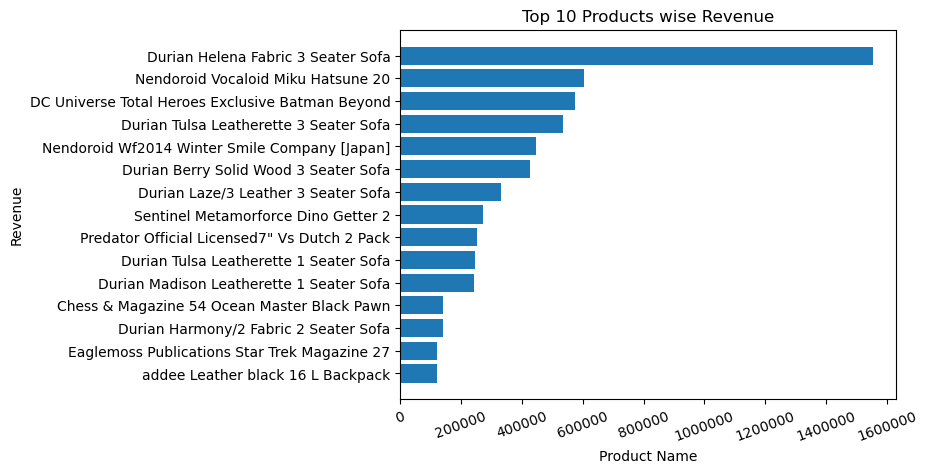

In [28]:
# now plotting 
plt.barh(prod_by_rev["ProductName"],prod_by_rev["Revenue"])
plt.xlabel("Product Name")
plt.ylabel("Revenue")
plt.ticklabel_format(style="plain", axis = 'x')
plt.xticks(rotation = 20)
plt.title("Top 10 Products wise Revenue")

The bar chart highlights the top-performing products based on total revenue. \
A small number of products contribute disproportionately to overall sales, indicating a revenue concentration effect.

#### Sales by Country

In [29]:
sales_by_reg = sales.groupby(sales["Country"], as_index=False)["Revenue"].sum()
sales_by_reg = sales_by_reg.sort_values(by = 'Revenue', ascending=False)
sales_by_reg

,Country,Revenue
5,United States,2815753.02
0,Australia,1856500.41
4,United Kingdom,934733.43
1,Canada,807922.73
3,Germany,801847.17
2,France,765915.70


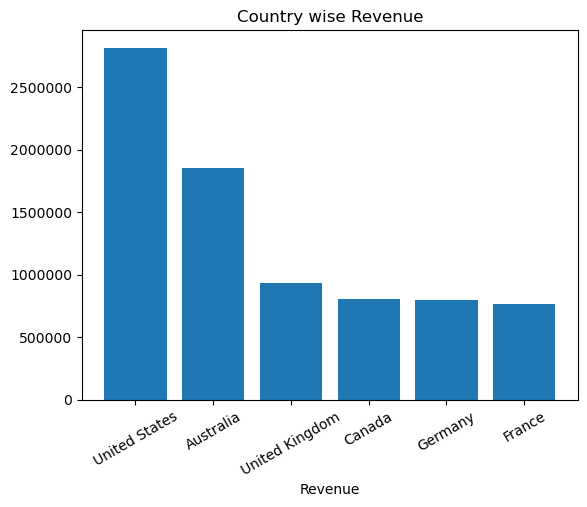

In [30]:
# now plotting
plt.bar(sales_by_reg["Country"],sales_by_reg["Revenue"])
plt.title('Country wise Revenue')
plt.xlabel('Revenue')
plt.xticks(rotation = 30)
plt.ticklabel_format(style = 'plain', axis='y')


Country wise revenue analysis shows how sales are distributed geographically, helping identify high-performing and underperforming markets.

#### Return Analysis

In [31]:
#grouping by product id
group_by_pid = returns.groupby(returns["Product_id"], as_index=False)
return_by_pid = group_by_pid["ReturnQuantity"].sum()
return_by_pid = return_by_pid.sort_values(by = 'ReturnQuantity', ascending=False).head(15)
return_by_pid

,Product_id,ReturnQuantity
58,477,155
61,480,95
73,528,93
59,478,77
0,214,70
74,529,67
2,220,66
60,479,56
66,485,54
1,215,52


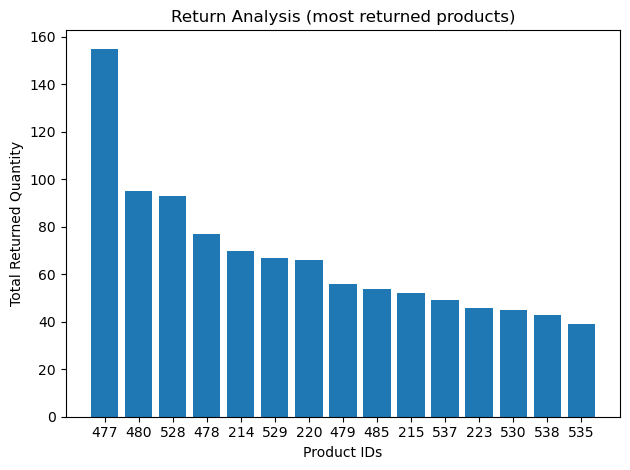

In [32]:
# now plotting
plt.bar(return_by_pid['Product_id'].astype(str),return_by_pid["ReturnQuantity"]) #astype is making the product ids categorical. 

plt.title('Return Analysis (most returned products)')
plt.xlabel('Product IDs')
plt.ylabel('Total Returned Quantity')

plt.tight_layout()


Above chart shows the total quantity of returned products, helps to analyse the product wise performance, and highlights the products upon which quality check is required

#### DEMAND ANALYSIS - Top Products by Demand (Quantity Sold)

In [42]:
# using previously grouped table on Product Name to perfrom aggregation
prod_demand = group_by_product["OrderQuantity"].sum()
prod_demand = prod_demand.sort_values(by = 'OrderQuantity', ascending=False).head(15)[::-1]
# prod_demand


Text(0.5, 1.0, 'Products of High Demand')

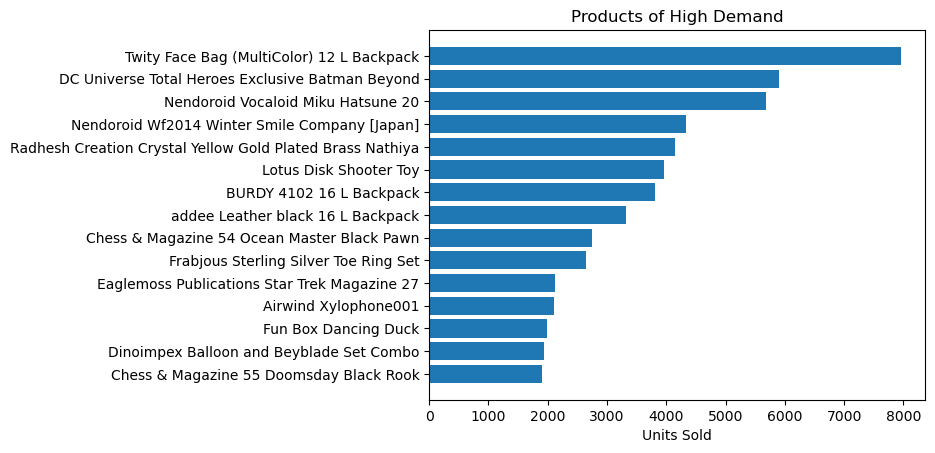

In [41]:
# plotting the data 
plt.barh(prod_demand["ProductName"],prod_demand["OrderQuantity"])
plt.xlabel('Units Sold')
plt.title('Products of High Demand')
 

This analysis ranks products based on total units sold, highlighting items with the highest customer demand.\
High-demand products are not always the highest-revenue products, indicating differences in pricing and volume strategies.

### Monthly Demand Analysis

In [44]:
# using previously grouped data
monthly_demand = group_month["OrderQuantity"].sum()
monthly_demand

,Month,OrderQuantity
0,1,7446
1,2,7260
2,3,7791
3,4,8174
4,5,8734
5,6,8784
6,7,2201
7,8,6236
8,9,6166
9,10,6610


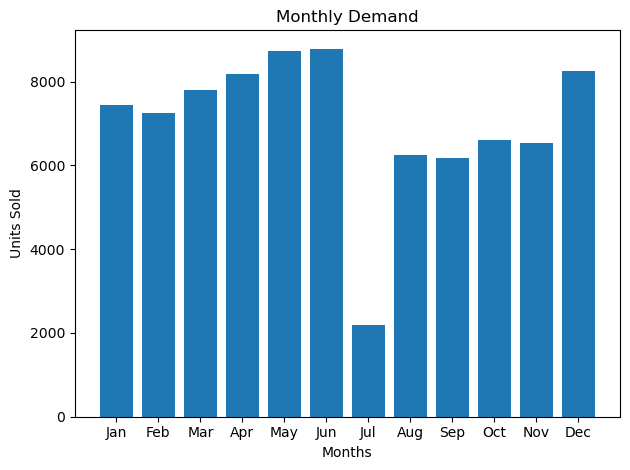

In [55]:
#now plotting the monthly demand

plt.bar(monthly_demand["Month"].astype(str),monthly_demand["OrderQuantity"])
plt.title("Monthly Demand")
plt.xticks(ticks=range(len(monthly_demand["Month"])),labels=months) #this can be reduced if months name is directly used in plt.bar method
plt.xlabel("Months")
plt.ylabel("Units Sold")
plt.tight_layout()


#### Gender wise Revenue Dustribution

In [58]:
#grouping the sales table by gender 
gender_grp = sales.groupby(sales["Gender"], as_index= False)
gender_by_rev = gender_grp["Revenue"].sum()
gender_by_rev

,Gender,Revenue
0,F,3958002.17
1,M,3971011.23


In [77]:
# # now plotting

# slices = [
#     gender_by_rev.loc[gender_by_rev["Gender"] == 'F', "Revenue"].iloc[0],
#     gender_by_rev.loc[gender_by_rev["Gender"] == 'M', "Revenue"].iloc[0]
# ] #this can be done in easy just saving the code example for future use
# labels=['Female','Male']
# plt.pie(slices,labels=labels, wedgeprops={'edgecolor':'black'})

## Final Insights & Conclusion Key Insights:

#### Strong RevenueGrowth Over Time Revenue rose sharply from 2015 to 2016, then continued to grow in 2017. This shows successful business growth, with initial rapid expansion stabilizing in the following years.

#### Revenue and Demand Do Not Always Align Products with high revenue are not always the ones with the highest sales volume. Some items sell in large quantities but bring in less revenue, which suggests lower prices or slimmer margins. Category Performance Differs by Metric Some product categories generate high revenue because of premium pricing, while others excel in sales volume. This highlights the different roles product categories play in the business. 

#### Clear Seasonality in Sales and Demand Both revenue and demand exhibit seasonal trends, with certain months seeing more customer activity. However, spikes in demand do not always lead to proportional revenue increases, indicating that sales during peak times may rely on promotions or discounts. 

#### Geographic Revenue Concentration Sales are concentrated in a few key regions and countries. This suggests that business performance strongly depends on specific geographic markets. 

#### Returns Impact Profitability Product returns, while not the main focus, do affect overall profitability. Some categories have higher return rates, which may point to quality issues or mismatched customer expectations. Business Recommendations. Balance Pricing and Volume Strategies Products with high demand but low revenue should be evaluated for pricing or bundling options to increase margins without significantly lowering demand. Focus on High-Profit Categories Categories that contribute significantly to profit should receive more marketing and inventory attention, even if their demand is less than high-volume categories. Leverage Seasonal Demand The identified peak demand months should be targeted with strategic pricing instead of heavy discounts to make the most of revenue during busy periods. 

#### Limitations:
#### This analysis relies on historical transaction data and does not consider outside factors like marketing efforts, economic conditions, or competitor actions. Customer age was estimated using date differences, which may not be completely precise but is adequate for segmentation analysis. 

#### Conclusion:
#### This project shows a complete sales analysis using Python, focusing on data preparation, feature engineering, exploratory data analysis, and business insights. By combining revenue, profit, demand, customer demographics, and geographic data, the analysis gives a solid understanding of business performance and points to actionable opportunities for growth and improvement.